In [1]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [9]:
# pd.read_html 함수 내에서 사용하는 패키지 설치
# html5lib : html 구문해석기
# !pip install html5lib

In [11]:
# 2차전지 테마 종목 from 네이버 증시
url = 'https://finance.naver.com/sise/sise_group_detail.naver?type=theme&no=64'

In [19]:
# 웹페이지 내에서 table태그를 데이터프레임으로 변환해서 리스트에 개별 요소로 저장
table = pd.read_html(url,encoding='cp949')
type(table)

d:\kdt_2\anaconda3\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


list

In [14]:
len(table)

3

In [15]:
type(table[2])

pandas.core.frame.DataFrame

In [16]:
table[2]

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,신성델타테크 *,테마 편입 사유,96100.0,"상승 16,500",+20.73%,89400.0,89500.0,735695.0,67062.0,449486.0,NaN,NaN
2,에스코넥 *,테마 편입 사유,639.0,상승 93,+17.03%,564.0,565.0,598491.0,368.0,305612.0,NaN,NaN
3,파워로직스 *,테마 편입 사유,5980.0,상승 780,+15.00%,5690.0,5700.0,627353.0,3621.0,186155.0,NaN,NaN
4,신성에스티 *,테마 편입 사유,27400.0,"상승 3,500",+14.64%,25500.0,25650.0,111268.0,2971.0,42481.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
136,LG화학,테마 편입 사유,266000.0,"하락 2,000",-0.75%,267000.0,267500.0,54531.0,14579.0,436988.0,NaN,NaN
137,자이글 *,테마 편입 사유,5040.0,하락 80,-1.56%,5140.0,5160.0,44818.0,228.0,278272.0,NaN,NaN
138,고려아연,테마 편입 사유,1440000.0,"하락 92,000",-6.01%,1469000.0,1476000.0,15132.0,22136.0,109717.0,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df = table[2]
type(df)

pandas.core.frame.DataFrame

In [18]:
# 데이터 크기확인
df.shape

(141, 12)

In [26]:
# 결측치 확인
df.isna().sum()

종목명              3
종목명.1            3
현재가              3
전일비              3
등락률              3
매수호가             3
매도호가             3
거래량              3
거래대금             3
전일거래량            3
토론실            141
Unnamed: 11    141
dtype: int64

In [22]:
# 결측치 제거
# 모든 행, 모든 열이 nan인 행,열 제거
df = df.dropna(how='all',axis=0).dropna(how='all',axis=1)

In [34]:
df.shape

(138, 10)

In [23]:
df.head(1)

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,에스코넥 *,테마 편입 사유,671.0,상승 125,+22.89%,573.0,582.0,886979.0,557.0,305612.0


In [24]:
# dataframe 구조 간단히 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 1 to 138
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     138 non-null    object 
 1   종목명.1   138 non-null    object 
 2   현재가     138 non-null    float64
 3   전일비     138 non-null    object 
 4   등락률     138 non-null    object 
 5   매수호가    138 non-null    float64
 6   매도호가    138 non-null    float64
 7   거래량     138 non-null    float64
 8   거래대금    138 non-null    float64
 9   전일거래량   138 non-null    float64
dtypes: float64(6), object(4)
memory usage: 11.9+ KB


In [25]:
# 수치형 컬럼의 기술 통계 요약
# 수치형 컬럼의 데이터 분포 확인
df.describe()

,현재가,매수호가,매도호가,거래량,거래대금,전일거래량
count,1.380000e+02,1.380000e+02,1.380000e+02,1.380000e+02,138.000000,1.380000e+02
mean,3.972217e+04,3.974749e+04,3.986233e+04,9.605874e+04,2430.768116,2.849091e+05
std,1.323913e+05,1.347028e+05,1.350472e+05,3.982677e+05,7767.437900,9.371593e+05
min,3.930000e+02,3.920000e+02,3.970000e+02,2.100000e+02,1.000000,9.060000e+03
25%,3.856250e+03,3.807500e+03,3.835000e+03,9.699000e+03,63.000000,4.459900e+04
50%,7.600000e+03,7.545000e+03,7.585000e+03,2.300850e+04,191.500000,1.089390e+05
75%,2.418750e+04,2.377500e+04,2.383750e+04,5.579400e+04,698.500000,2.451975e+05
max,1.430000e+06,1.460000e+06,1.464000e+06,4.405724e+06,72521.000000,9.543639e+06


In [28]:
# 범주형 컬럼의 기술 통계 요약
df.describe(include='O')

,종목명,종목명.1,전일비,등락률
count,138,138,138,138
unique,138,1,92,125
top,에스코넥 *,테마 편입 사유,상승 480,+3.81%
freq,1,138,4,3


In [29]:
# 종목명.1 컬럼 제거
df = df.drop('종목명.1',axis=1)

In [30]:
df.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,에스코넥 *,671.0,상승 125,+22.89%,573.0,582.0,886979.0,557.0,305612.0


#### 종목명별 거래량 상위 20 종목 가져와서 바차트를 이용해 시각화하기

In [37]:
# 종목명별 거래량 오름차순
df[['종목명','거래량']].sort_values('거래량')

,종목명,거래량
103,디에스케이 *,210.0
36,티이엠씨씨엔에스 *,841.0
100,영화테크 *,1193.0
112,동원시스템즈,1306.0
108,조광페인트,1710.0
...,...,...
3,파워로직스 *,761162.0
2,신성델타테크 *,792556.0
1,에스코넥 *,886979.0
136,금양,946945.0


In [39]:
# 종목명별 거래량 오름차순 후 상위 20개 가져오기
df[['종목명','거래량']].sort_values('거래량').tail(20)

,종목명,거래량
28,광무 *,93975.0
19,코스모신소재,98527.0
55,펨트론 *,98600.0
71,조일알미늄,99129.0
124,엔켐 *,101553.0
35,미코 *,105242.0
6,한빛레이저 *,122608.0
118,에코프로머티,124874.0
4,신성에스티 *,129345.0
12,이엔플러스,143291.0


In [42]:
# 종목명별 거래량 오름차순 후 상위 20개 가져와서 종목명을 인덱스로 이동하기(인덱스를 차트의 x축에 놓기위함)
df[['종목명','거래량']].sort_values('거래량').tail(20).set_index('종목명')

,거래량
종목명,
광무 *,93975.0
코스모신소재,98527.0
펨트론 *,98600.0
조일알미늄,99129.0
엔켐 *,101553.0
미코 *,105242.0
한빛레이저 *,122608.0
에코프로머티,124874.0
신성에스티 *,129345.0


<Axes: ylabel='종목명'>

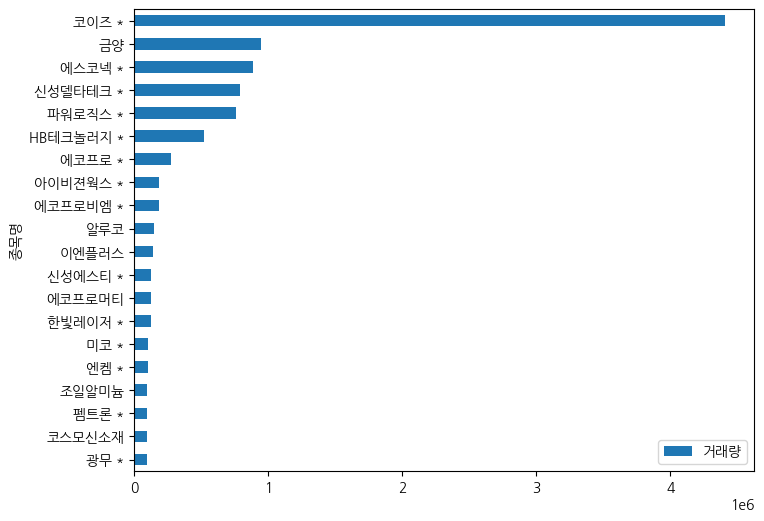

In [45]:
# 종목명별 거래량 오름차순 후 상위 20개 가져와서 종목명을 인덱스로 이동후 막대그래프 그리기
df[['종목명','거래량']].sort_values('거래량').tail(20).set_index('종목명').plot(kind='barh',figsize=(8,6))